In [1]:
import pandas as pd
import string
import re
import ast
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wordcloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [2]:
df1= pd.read_csv("Grab SG Restaurants.csv")

In [3]:
df1.shape

(16136, 19)

In [4]:
df1=df1.loc[df1['loc_type']=='FOOD']


# Preprocessing

In [5]:
df1[['name', 'address']]=df1[['name', 'address']].applymap(lambda x: str(x).strip())

In [6]:
df1['currency']=df1['currency'].fillna('SGD')
df1['delivery_cost']=df1['delivery_cost'].apply(lambda c: c/100)
#count number of cuisine per restaurant
df1['cuisine_count']= df1['cuisine'].apply(lambda x: len(str(x).split(',')))
df1['location']= df1['address'].apply(lambda x: str(x).split(' - ')[-1])
df1= df1.drop(['image_url','id_source'], axis=1)
df1['promo_count'] = df1['promo'].apply(lambda x: 'yes promo'if not pd.isnull(x) else 'no promo')


In [7]:
#breaking down of delivery options
df1['delivery_options']= df1['delivery_options'].apply(lambda x: str(x).replace('ONLY_DELIVERY', 'Delivery'))
df1['delivery_options']= df1['delivery_options'].apply(lambda x: str(x).lower().replace ('_',' ,'))
df1['delivery_options_count'] = df1.delivery_options.apply(lambda x:len(str(x).split(',')))

In [8]:
#remove rows with empty rating and reviews
df1=  df1.dropna(subset=['reviews_nr','rating','cuisine','name','delivery_time','delivery_cost']) 

In [9]:
df1['cuisine'] = df1['cuisine'].apply(lambda x: ast.literal_eval(x))

In [10]:
def cleanup_text(text):
    list=[]
    for token in word_tokenize(text):
        token= token.lower() #lowercase
        token= re.sub(r'\d+', '', token)  # remove numbers
        token= re.sub(r' +', ' ', token) # remove multiple spaces
        token= re.sub(r'\n', ' ', token) # remove newline
        token= re.sub(r'[^\w\s]', '', token) #remove punctuation        
        list.append(token)
    
    return ' '.join(list)



In [11]:
df1[['location','name']] = df1[['location','name']].applymap(cleanup_text)

In [12]:
df1['location']= df1['location'].str.strip()
df1['location'].value_counts(ascending=False)

ang mo kio ave                       136
tampines street                      117
jurong west street                    97
nex                                   85
bukit batok street                    84
                                    ... 
the garden slug                        1
frontier canteen                       1
e coast road  islandwide delivery      1
djitsun mall                           1
soho  farrer                           1
Name: location, Length: 3129, dtype: int64

In [13]:
df1.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,...,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location,promo_count,delivery_options_count
0,texas chicken,Texas Chicken - VivoCity,Singapore,"[Western, Fast Food, Halal, Chicken, Beverages]",SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,"[Healthy, Sandwiches, Fast Food, Halal, Western]",SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
2,liho tea,LiHO Tea - Vivo City,Singapore,"[Same Prices In-Store, Beverages, Local, Bubbl...",SGD,5.6,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,...,353.0,"delivery ,takeaway",Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,4,vivo city,yes promo,2
3,wingstop,Wingstop - VivoCity,Singapore,"[Halal, Chicken, Fast Food, Burger, Western]",SGD,5.6,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,...,1391.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,5,vivocity,yes promo,1
4,le shrimp ramen,Le Shrimp Ramen - Vivocity,Singapore,"[Japanese, Ramen, Noodles, Asian]",SGD,5.7,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,...,309.0,"delivery ,takeaway",Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,4,vivocity,yes promo,2


In [14]:
df2 = df1.explode('cuisine')

In [15]:
df2.head(10)

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,...,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location,promo_count,delivery_options_count
0,texas chicken,Texas Chicken - VivoCity,Singapore,Western,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Fast Food,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Halal,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Chicken,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
0,texas chicken,Texas Chicken - VivoCity,Singapore,Beverages,SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Healthy,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Sandwiches,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Fast Food,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Halal,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,Western,SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1


In [16]:
df2['cuisine'] = df2['cuisine'].apply(cleanup_text)

In [17]:
df1['name'].nunique()

6954

In [18]:
df1.shape

(11900, 21)

# EDA- Cuisines

In [19]:
lemmatizer = WordNetLemmatizer()
df2['cuisine'] = df2['cuisine'].apply(lambda x:"".join([lemmatizer.lemmatize(i) for i in x]))

In [20]:
text_food=" ".join(df2['cuisine'])

(-0.5, 799.5, 299.5, -0.5)

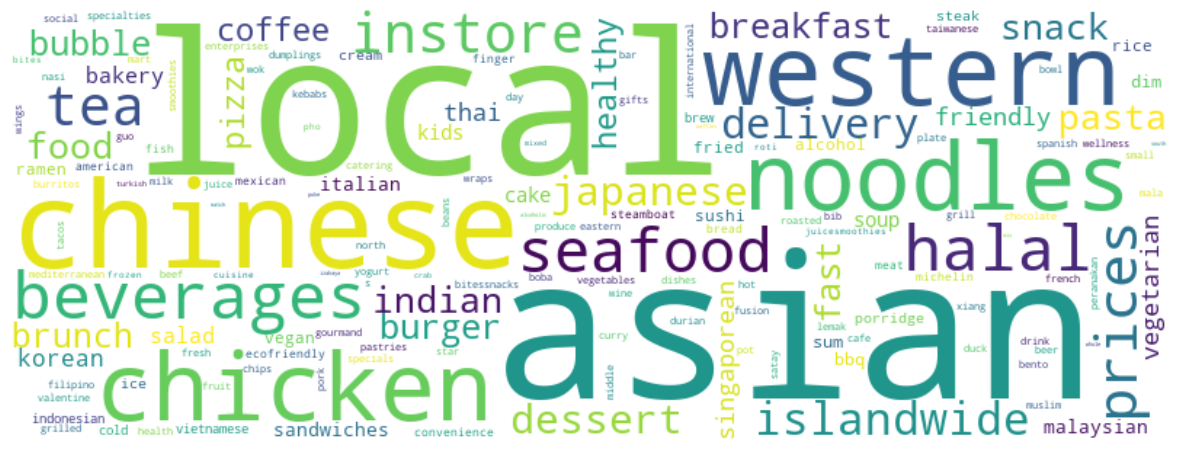

In [21]:
# Create a WordCloud object
#wcloud = wordcloud.WordCloud(collocations = False)
#wcloud = wcloud.generate(text_food)
# Open a plot of the generated image

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", width=800, height=300, collocations= False)
wc.generate(text_food)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')


In [22]:
plt.figure(figsize = (16,6))
sns.set(font_scale=1.1)

<Figure size 1600x600 with 0 Axes>

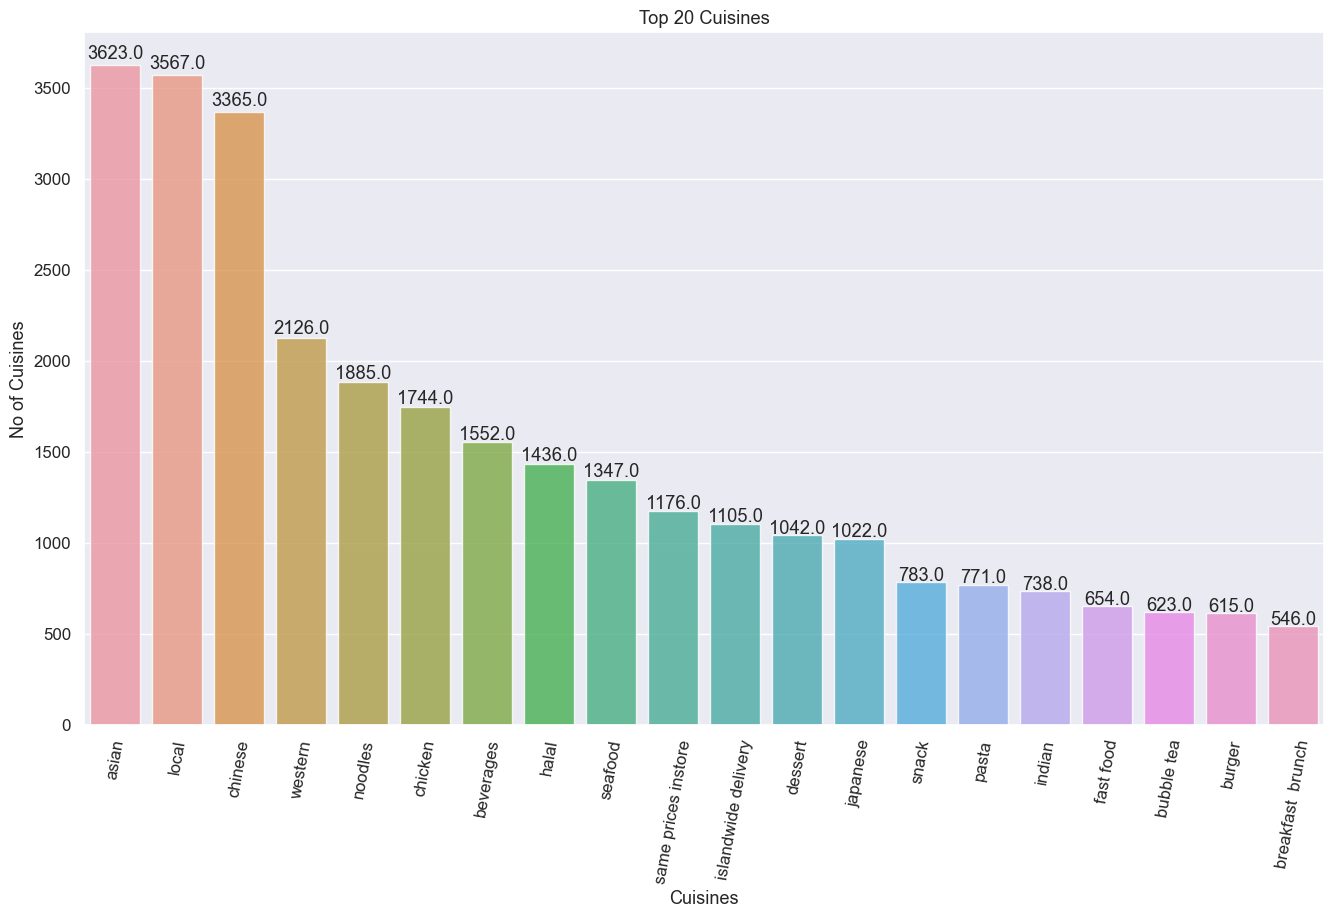

In [23]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df2['cuisine'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df2, alpha=0.8)
plt.title('Top 20 Cuisines')
plt.ylabel('No of Cuisines', fontsize=13)
plt.xlabel('Cuisines', fontsize=13)
plt.xticks(rotation=80)

show_values(ax)

# EDA- Location 

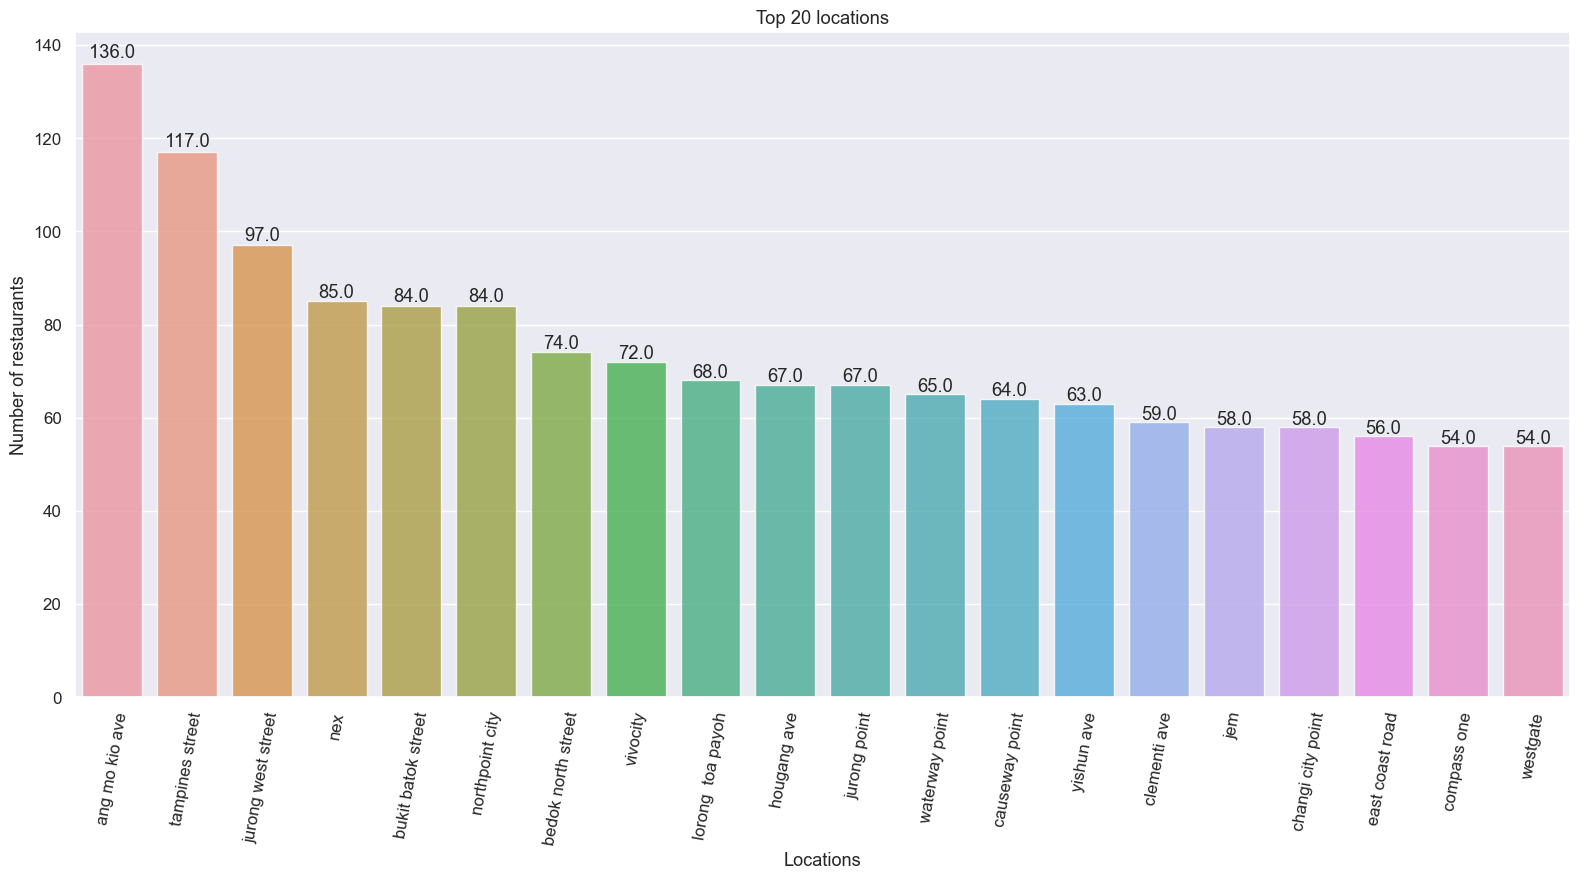

In [24]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['location'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Top 20 locations')
plt.ylabel('Number of restaurants', fontsize=13)
plt.xlabel('Locations', fontsize=13)
plt.xticks(rotation=80)
plt.tight_layout()

show_values(ax)

# EDA- Food

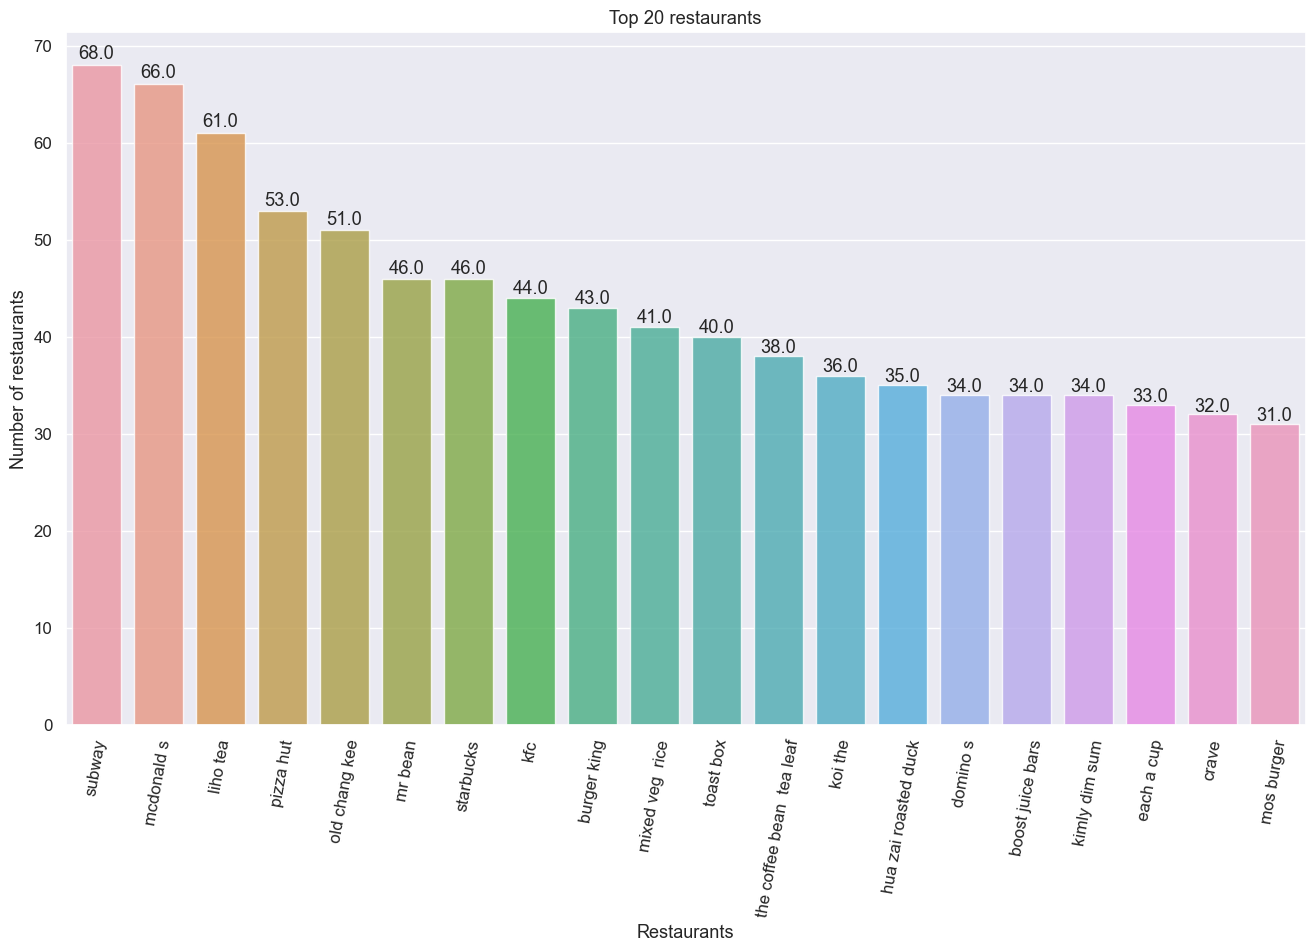

In [25]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['name'].value_counts()
loc_count = loc_count[:20,]

plt.figure(figsize=(16,9))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Top 20 restaurants')
plt.ylabel('Number of restaurants', fontsize=13)
plt.xlabel('Restaurants', fontsize=13)
plt.xticks(rotation=80)

show_values(ax)

In [26]:
shops_name =" ".join(df2['name'])

(-0.5, 1599.5, 799.5, -0.5)

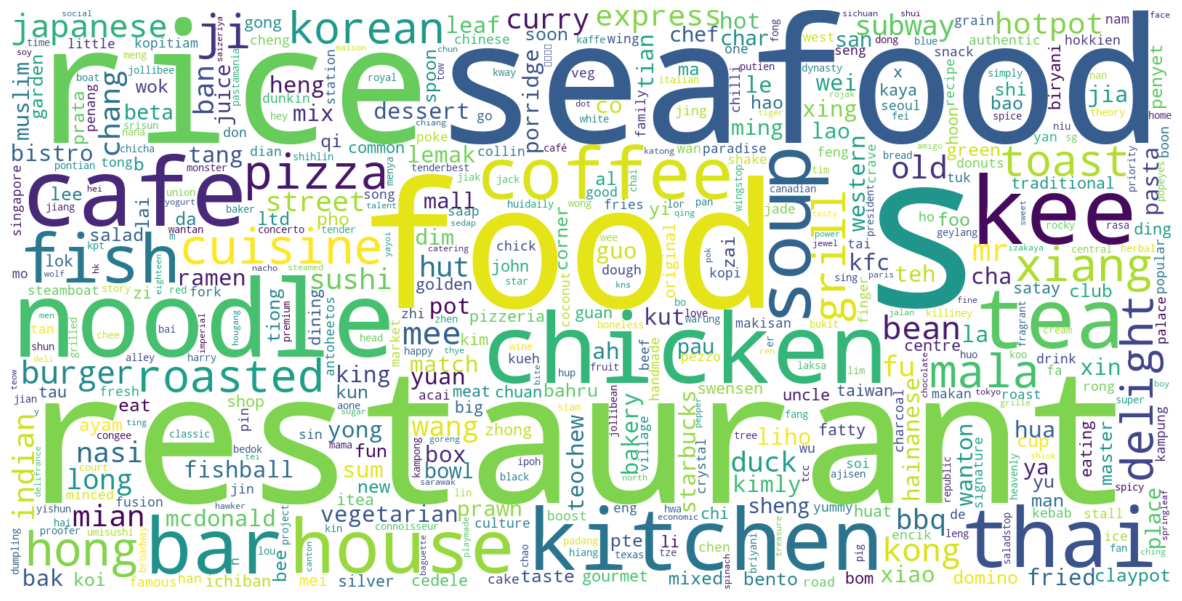

In [27]:
# Create a WordCloud object
#wcloud = wordcloud.WordCloud(collocations = False)
#wcloud = wcloud.generate(same_price)
# Open a plot of the generated image

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white", max_words=500, max_font_size= 300,  width=1600, height=800, collocations= False)
wc.generate(shops_name)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

# EDA- Delivery options

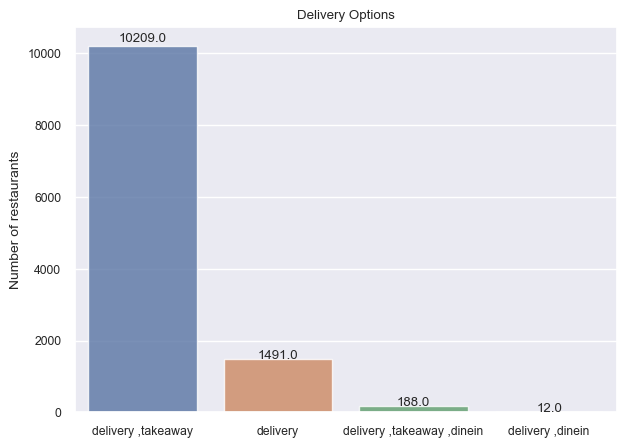

In [28]:
sns.set(font_scale=0.8)

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['delivery_options'].value_counts()
#loc_count = loc_count[:4,]

plt.figure(figsize=(7,5))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Delivery Options')
plt.ylabel('Number of restaurants', fontsize=10)
#plt.xlabel('Options', fontsize=10)
#plt.xticks(rotation=80)

show_values(ax)

## EDA_ PROMO

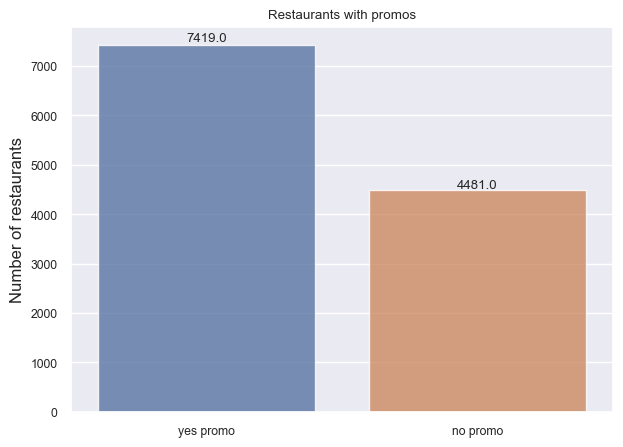

In [29]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
loc_count  = df1['promo_count'].value_counts()
#loc_count = loc_count[:4,]

plt.figure(figsize=(7,5))
ax = sns.barplot(x = loc_count.index, y = loc_count.values, data=df1, alpha=0.8)
plt.title('Restaurants with promos')
plt.ylabel('Number of restaurants', fontsize=12)
#plt.xlabel('Options', fontsize=12)
#plt.xticks(rotation=90)

show_values(ax)

<AxesSubplot:ylabel='promo_count'>

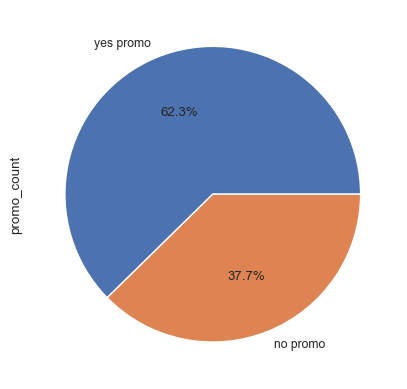

In [30]:
df1.promo_count.value_counts().plot(kind='pie', autopct='%1.1f%%')

# EDA - Rating & Reviews distribution

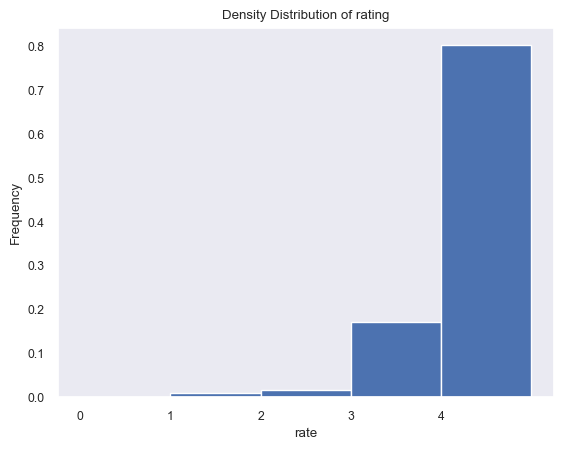

In [31]:
df1['rating'].plot.hist(bins=5, alpha=1, density=True, range=(0,5))

# show setting
plt.title('Density Distribution of rating')
plt.xticks(np.arange(0, 5, step=1))
plt.xlabel('rate')
plt.grid()

count    11900.000000
mean         4.206294
std          0.543332
min          1.000000
25%          4.000000
50%          4.300000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

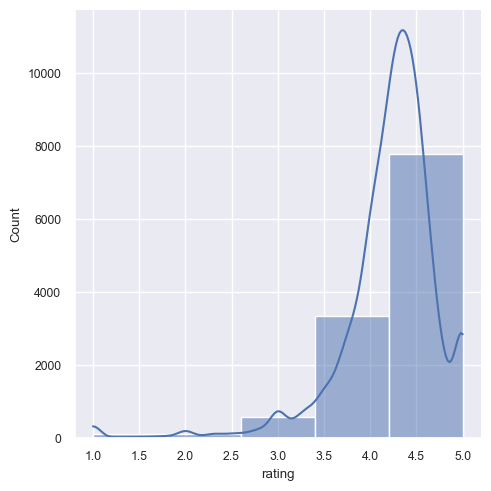

In [32]:
sns.displot(df1['rating'], kde=True, bins=5)
df1['rating'].describe()

count    11900.000000
mean       382.307731
std        896.608622
min          1.000000
25%         21.000000
50%         92.000000
75%        361.000000
max      21113.000000
Name: reviews_nr, dtype: float64

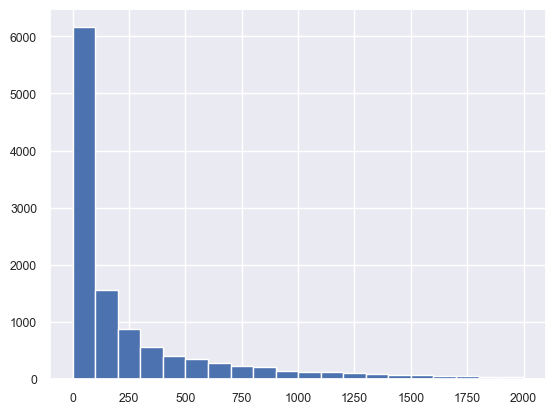

In [33]:
plt.hist(df1['reviews_nr'], bins=20, range=[1, 2000])
df1['reviews_nr'].describe()

# EDA- Delivery Cost, Time, radius

count    11900.000000
mean        10.253918
std          6.680294
min          1.990000
25%          4.500000
50%          6.900000
75%         16.800000
max         40.000000
Name: delivery_cost, dtype: float64

<Figure size 1600x900 with 0 Axes>

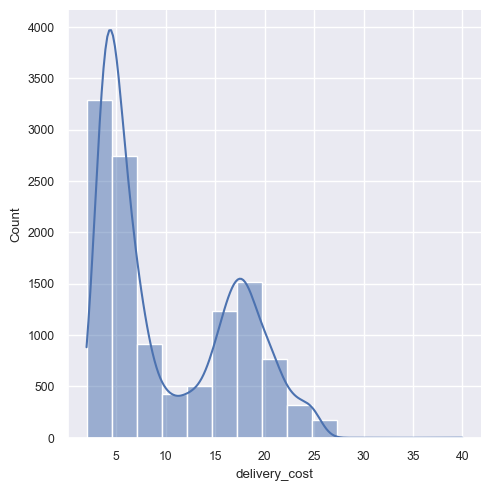

In [34]:
plt.figure(figsize=(16,9))

sns.displot(df1['delivery_cost'], kde=True, bins=15)
df1['delivery_cost'].describe()

count    11900.000000
mean        38.503950
std         15.448732
min         15.000000
25%         29.000000
50%         35.000000
75%         42.000000
max        150.000000
Name: delivery_time, dtype: float64

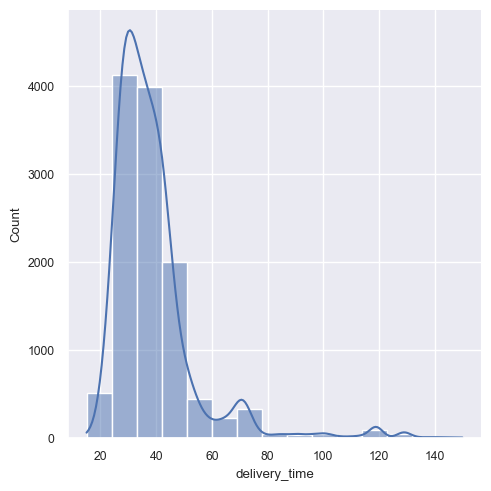

In [35]:
sns.displot(df1['delivery_time'], kde=True, bins=15)
df1['delivery_time'].describe()

count    11900.000000
mean      6596.085126
std       6211.078306
min       2000.000000
25%       4999.000000
50%       5000.000000
75%       5000.000000
max      25000.000000
Name: radius, dtype: float64

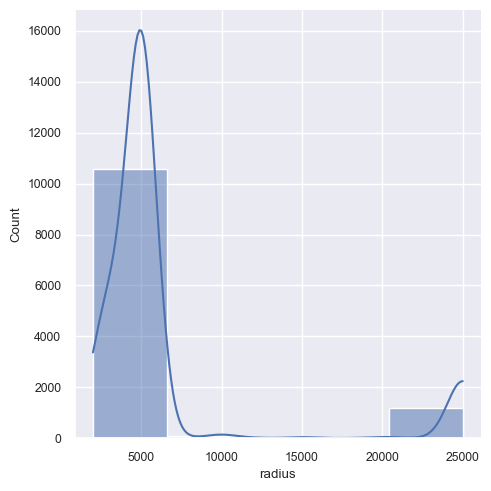

In [36]:
sns.displot(df1['radius'], kde=True, bins=5)
df1['radius'].describe()

# Model_Data selection

In [37]:
df_4 = df1[(df1['delivery_options'] == 'delivery') 
          & (df1['delivery_by'] == 'GRAB')
          & (df1['reviews_nr'] > 20)]

In [38]:
df_4.head()

,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,radius,...,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,cuisine_count,location,promo_count,delivery_options_count
0,texas chicken,Texas Chicken - VivoCity,Singapore,"[Western, Fast Food, Halal, Chicken, Beverages]",SGD,5.7,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,...,1591.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,5,vivocity,yes promo,1
1,subway,Subway - Vivocity,Singapore,"[Healthy, Sandwiches, Fast Food, Halal, Western]",SGD,5.7,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,...,197.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,5,vivocity,yes promo,1
3,wingstop,Wingstop - VivoCity,Singapore,"[Halal, Chicken, Fast Food, Burger, Western]",SGD,5.6,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,...,1391.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,5,vivocity,yes promo,1
6,burger king,Burger King - VivoCity,Singapore,"[American, Burger, Halal]",SGD,5.6,1.263741,103.821354,"{""open"": true, ""displayedHours"": ""09:00-21:45""...",5000,...,389.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,3,vivocity,yes promo,1
12,ayam penyet president,Ayam Penyet President - Vivocity,Singapore,"[Halal, Local, Chicken, Same Prices In-Store]",SGD,5.7,1.264905,103.822693,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,...,1027.0,delivery,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,4,vivocity,yes promo,1


In [39]:
df_4 = df_4[['cuisine_count','promo_count','rating','delivery_cost','radius','delivery_time']]

In [40]:
df_4.shape

(1229, 6)

In [41]:
df_used2 = pd.get_dummies(df_4)
df_used2.columns

Index(['cuisine_count', 'rating', 'delivery_cost', 'radius', 'delivery_time',
       'promo_count_no promo', 'promo_count_yes promo'],
      dtype='object')

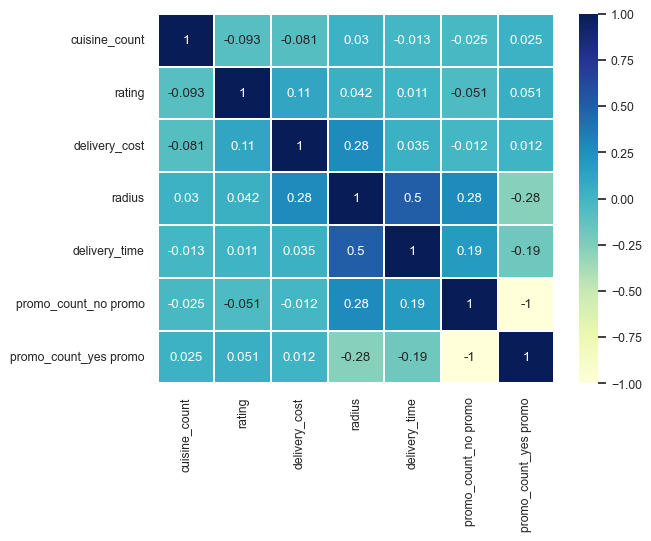

In [42]:
corr_matrix2 = df_used2.corr()
dataplot = sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True, linewidth=.3)
plt.show()

In [43]:
df_4.head()

,cuisine_count,promo_count,rating,delivery_cost,radius,delivery_time
0,5,yes promo,3.8,5.7,5000,43.0
1,5,yes promo,4.2,5.7,3000,42.0
3,5,yes promo,4.4,5.6,5000,45.0
6,3,yes promo,4.1,5.6,5000,41.0
12,4,yes promo,4.5,5.7,5000,42.0


In [44]:
import pandas as pd

df_4.to_csv('New_dataset.csv', index=False)

# Model

In [52]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('New_dataset.csv', usecols=[ 'delivery_time','cuisine_count', 'promo_count', 'rating','delivery_cost'])

# 过滤reviews_nr>10的数据
#data = data[data['reviews_nr'] > 10]

data = data.dropna()

data['promo_count'] = data['promo_count'].replace({'no promo': -1, 'yes promo': 1})

data = data.sort_values('rating', ascending=False)


- 算相关性，决定feature
- 看data balance
- 算模糊矩阵，判断算对的多少
- 看是否换模型、调整参数

count    1229.000000
mean        4.322539
std         0.274731
min         2.700000
25%         4.200000
50%         4.400000
75%         4.500000
max         5.000000
Name: rating, dtype: float64


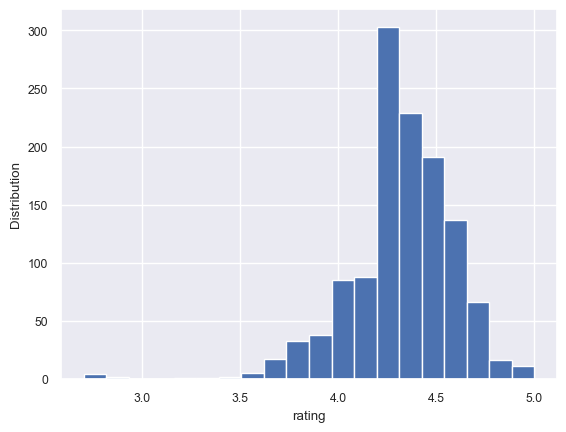

Q1 (33th Percentile): 4.2
Q2 (67th Percentile): 4.5
Two values that divide the rating into three equal parts: 4.2 4.5


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# 打印 rating 列的统计描述信息
print(data['rating'].describe())

# 绘制 rating 列的直方图
plt.hist(data['rating'], bins=20)
plt.xlabel('rating')
plt.ylabel('Distribution')
plt.show()

# 计算三等分点
q1 = np.percentile(data['rating'], 33)
q2 = np.percentile(data['rating'], 67)

# 打印三等分点
print("Q1 (33th Percentile):", q1)
print("Q2 (67th Percentile):", q2)

# 找到能把所有rating分为三部分的两个值
r1 = data['rating'][data['rating'] <= q1].max()
r2 = data['rating'][(data['rating'] > q1) & (data['rating'] <= q2)].max()

# 打印结果
print("Two values that divide the rating into three equal parts:", r1, r2)



In [54]:
def rating_to_rate(rating):
    if rating <= 4.2:
        return 0
    elif rating <= 4.5:
        return 1
    else:
        return 2
    
data['rate'] = data['rating'].apply(rating_to_rate)
data.head(5)



,cuisine_count,promo_count,rating,delivery_cost,delivery_time,rate
627,2,1,5.0,3.3,38.0,2
1099,4,1,4.9,20.8,35.0,2
664,4,1,4.9,17.7,33.0,2
314,5,1,4.9,8.3,46.0,2
52,4,-1,4.9,12.8,64.0,2


In [55]:
len(data)

1229

In [56]:
data.head(1)

,cuisine_count,promo_count,rating,delivery_cost,delivery_time,rate
627,2,1,5.0,3.3,38.0,2


In [57]:
columns_to_normalize = ['cuisine_count', 'promo_count','delivery_cost','delivery_time']
data_to_normalize = data[columns_to_normalize]

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

data[columns_to_normalize] = normalized_data

In [58]:
data.head(1)

,cuisine_count,promo_count,rating,delivery_cost,delivery_time,rate
627,0.25,1.0,5.0,0.056769,0.175573,2


In [59]:
from sklearn.model_selection import train_test_split

train_ratio = 0.7  
test_ratio = 0.2 
val_ratio = 0.1    

# 划分训练集和测试集，并保持 rate=1、2、3 的数据平衡
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42, stratify=data['rate'])
# 在训练集中再次划分验证集，并保持 rate=1、2、3 的数据平衡
train_data, val_data = train_test_split(train_data, test_size=val_ratio/(train_ratio), random_state=42, stratify=train_data['rate'])


In [60]:
train_data.head(5)

,cuisine_count,promo_count,rating,delivery_cost,delivery_time,rate
429,1.0,1.0,4.5,0.087336,0.236641,1
992,0.5,1.0,4.4,0.113537,0.053435,1
589,1.0,1.0,4.0,0.109170,0.221374,0
605,0.5,1.0,4.4,0.414847,0.068702,1
990,0.5,1.0,4.5,0.056769,0.099237,1


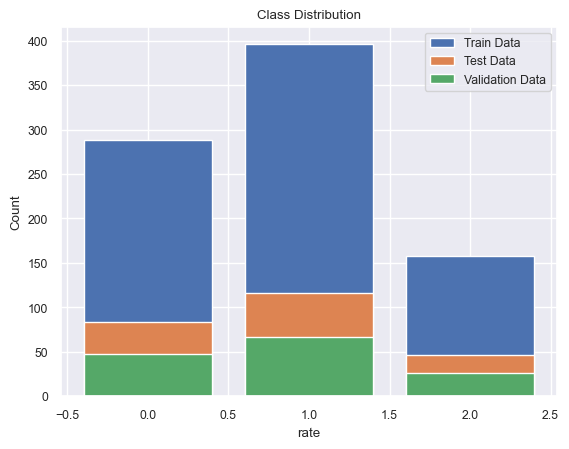

In [61]:
import matplotlib.pyplot as plt

# 计算 train_data 中每个类别的样本数量
train_data_counts = train_data['rate'].value_counts()

# 计算 test_data 中每个类别的样本数量
test_data_counts = test_data['rate'].value_counts()

# 计算 val_data 中每个类别的样本数量
val_data_counts = val_data['rate'].value_counts()

# 创建柱状图
plt.bar(train_data_counts.index, train_data_counts.values, label='Train Data')
plt.bar(test_data_counts.index, test_data_counts.values, label='Test Data')
plt.bar(val_data_counts.index, val_data_counts.values, label='Validation Data')

# 设置图表标题和标签
plt.title('Class Distribution')
plt.xlabel('rate')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 显示图表
plt.show()

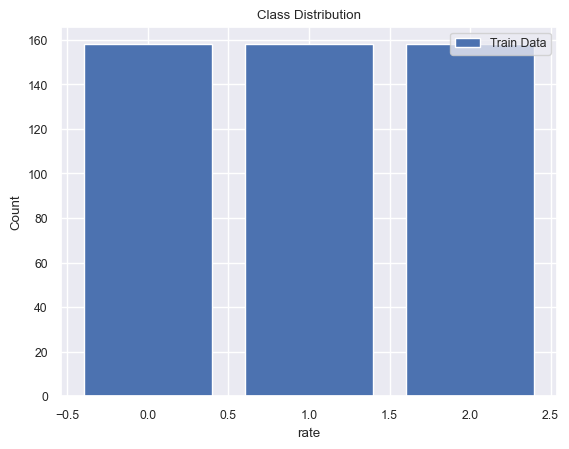

In [62]:
# 计算训练集中各类别的样本数量
train_data_counts = train_data['rate'].value_counts()

# 获取数量最少的类别的样本数量
min_count = train_data_counts.min()

# 对数量较多的类别进行下采样，使其与数量较少的类别的样本数量相当
train_data_balanced = pd.concat([group.sample(n=min_count, replace=False, random_state=42)
                                 for _, group in train_data.groupby('rate')])

# 重新计算 train_data_balanced 中每个类别的样本数量
train_data_balanced_counts = train_data_balanced['rate'].value_counts()

# 创建柱状图
plt.bar(train_data_balanced_counts.index, train_data_balanced_counts.values, label='Train Data')

# 设置图表标题和标签
plt.title('Class Distribution')
plt.xlabel('rate')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 显示图表
plt.show()


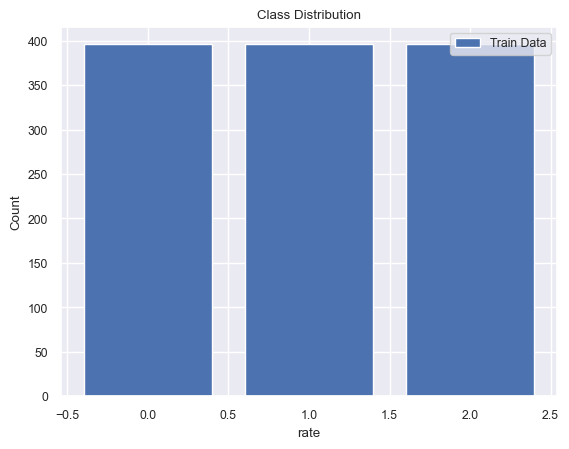

In [63]:
from sklearn.utils import resample

# 计算训练集中各类别的样本数量
train_data_counts = train_data['rate'].value_counts()

# 获取数量最多的类别的样本数量
max_count = train_data_counts.max()

# 对数量较少的类别进行过采样，使其与数量较多的类别的样本数量相当
train_data_balanced = pd.concat([resample(group, n_samples=max_count, replace=True, random_state=42)
                                 for _, group in train_data.groupby('rate')])

# 重新计算 train_data_balanced 中每个类别的样本数量
train_data_balanced_counts = train_data_balanced['rate'].value_counts()

# 创建柱状图
plt.bar(train_data_balanced_counts.index, train_data_balanced_counts.values, label='Train Data')

# 设置图表标题和标签
plt.title('Class Distribution')
plt.xlabel('rate')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 显示图表
plt.show()


count    1229.000000
mean        0.652360
std         0.282365
min         0.000000
25%         0.500000
50%         0.750000
75%         1.000000
max         1.000000
Name: cuisine_count, dtype: float64


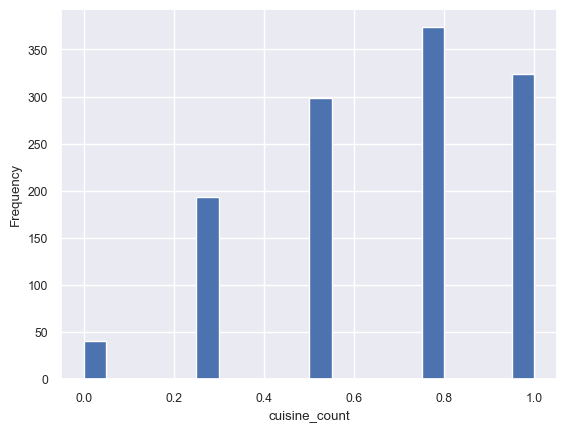

In [64]:
print(data['cuisine_count'].describe())
plt.hist(data['cuisine_count'], bins=20)
plt.xlabel('cuisine_count')
plt.ylabel('Frequency')
plt.show()

count    1229.000000
mean        0.844589
std         0.362443
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: promo_count, dtype: float64


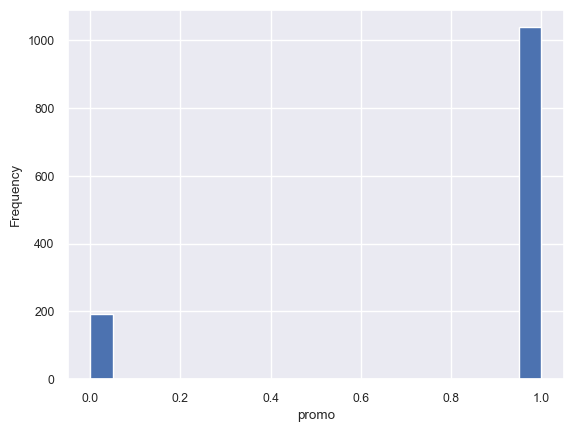

In [67]:
print(data['promo_count'].describe())
plt.hist(data['promo_count'], bins=20)
plt.xlabel('promo')
plt.ylabel('Frequency')
plt.show()

count    1229.000000
mean        0.845403
std         0.710912
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: rate, dtype: float64


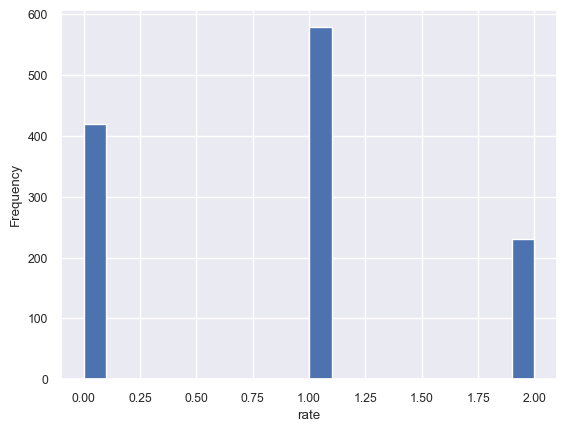

In [68]:
print(data['rate'].describe())
plt.hist(data['rate'], bins=20)
plt.xlabel('rate')
plt.ylabel('Frequency')
plt.show()

### LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score
import pandas as pd
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = train_data[['cuisine_count', 'promo_count','delivery_cost']]
y = train_data['rate']
X_test = test_data[['cuisine_count', 'promo_count','delivery_cost']]
y_test = test_data['rate']
X_val = val_data[['cuisine_count', 'promo_count','delivery_cost']]
y_val = val_data['rate']

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

param_grid = {'fit_intercept': [True, False], 'positive': [True, False], 'n_jobs': [-1, 1]}

model = LinearRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

y_pred = grid_search.predict(X_test)
y_pred = y_pred.round().astype(int)
mse = mean_squared_error(y_test, y_pred)

y_val_pred = grid_search.predict(X_val)
y_val_pred = y_val_pred.round().astype(int)
mse_val = mean_squared_error(y_val, y_val_pred)

accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_2 = accuracy_score(y_val, y_val_pred)

# Calculate F1 score
f1_score_1 = f1_score(y_test, y_pred, average='macro')
f1_score_2 = f1_score(y_val, y_val_pred, average='macro')

best_model = grid_search.best_estimator_
coefficients = best_model.coef_
intercept = best_model.intercept_

print("Testing accuracy:", accuracy_1)
print("Validation accuracy:", accuracy_2)
print("Testing F1 score:", f1_score_1)
print("Validation F1 score:", f1_score_2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Testing accuracy: 0.4715447154471545
Validation accuracy: 0.475177304964539
Testing F1 score: 0.21362799263351748
Validation F1 score: 0.21474358974358976
Coefficients: [-0.10007513  0.04074889  0.07862706]
Intercept: 0.8456057007125891


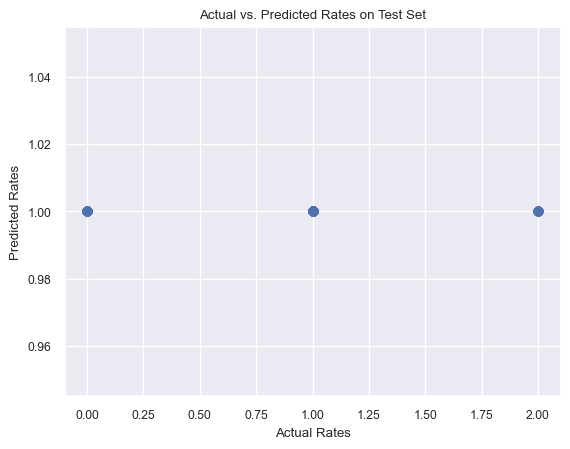

In [71]:
import matplotlib.pyplot as plt

# 绘制测试集预测结果和实际结果的散点图
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rates')
plt.ylabel('Predicted Rates')
plt.title('Actual vs. Predicted Rates on Test Set')
plt.show()

### SVM

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = train_data[['cuisine_count', 'promo_count','delivery_cost']]
y = train_data['rate']
X_test = test_data[['cuisine_count', 'promo_count','delivery_cost']]
y_test = test_data['rate']
X_val = val_data[['cuisine_count', 'promo_count','delivery_cost']]
y_val = val_data['rate']

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

#param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

#model = SVC()
model = SVC(C=10, kernel='rbf', gamma='auto')

#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
model.fit(X, y)

y_pred = model.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred)
f1_score_1 = f1_score(y_test, y_pred, average='weighted')

y_val_pred = model.predict(X_val)
accuracy_2 = accuracy_score(y_val, y_val_pred)
f1_score_2 = f1_score(y_val, y_val_pred, average='weighted')

print("Testing accuracy:", accuracy_1)
print("Validation accuracy:", accuracy_2)
print("Testing F1 score:", f1_score_1)
print("Validation F1 score:", f1_score_2)

from sklearn.metrics import mean_squared_error



Testing accuracy: 0.491869918699187
Validation accuracy: 0.46808510638297873
Testing F1 score: 0.42764555085932415
Validation F1 score: 0.40481031396772854


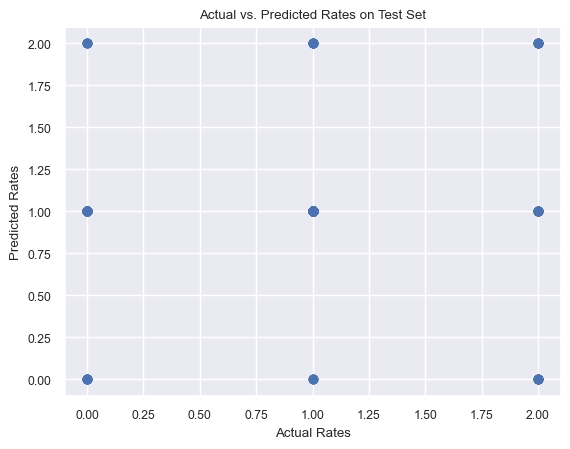

In [73]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rates')
plt.ylabel('Predicted Rates')
plt.title('Actual vs. Predicted Rates on Test Set')
plt.show()

### DecisionTree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X = train_data[['cuisine_count', 'promo_count','delivery_cost']]
y = train_data['rate']
X_test = test_data[['cuisine_count', 'promo_count','delivery_cost']]
y_test = test_data['rate']
X_val = val_data[['cuisine_count', 'promo_count','delivery_cost']]
y_val = val_data['rate']

scaler = StandardScaler()
X= scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

#param_grid = {'max_depth': [3, 5, 7, 10], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 10]}

model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10)

#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
model.fit(X, y)

y_pred = model.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred)
f1_score_1 = f1_score(y_test, y_pred, average='weighted')

y_val_pred = model.predict(X_val)
accuracy_2 = accuracy_score(y_val, y_val_pred)
f1_score_2 = f1_score(y_val, y_val_pred, average='weighted')

print("Testing accuracy:", accuracy_1)
print("Validation accuracy:", accuracy_2)
print("Testing F1 score:", f1_score_1)
print("Validation F1 score:", f1_score_2)

from sklearn.metrics import mean_squared_error



Testing accuracy: 0.43089430894308944
Validation accuracy: 0.48936170212765956
Testing F1 score: 0.4180138429491605
Validation F1 score: 0.48152314600100854


### RandomForest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

X = train_data[['cuisine_count', 'promo_count', 'delivery_cost']]
y = train_data['rate']
X_test = test_data[['cuisine_count', 'promo_count', 'delivery_cost']]
y_test = test_data['rate']
X_val = val_data[['cuisine_count', 'promo_count', 'delivery_cost']]
y_val = val_data['rate']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

model = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=200)
model.fit(X, y)

y_pred = model.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred)
f1_score_1 = f1_score(y_test, y_pred, average='weighted')

y_val_pred = model.predict(X_val)
accuracy_2 = accuracy_score(y_val, y_val_pred)
f1_score_2 = f1_score(y_val, y_val_pred, average='weighted')

print("Testing accuracy:", accuracy_1)
print("Validation accuracy:", accuracy_2)
print("Testing F1 score:", f1_score_1)
print("Validation F1 score:", f1_score_2)

from sklearn.metrics import mean_squared_error



Testing accuracy: 0.4796747967479675
Validation accuracy: 0.49645390070921985
Testing F1 score: 0.37182401062025483
Validation F1 score: 0.37014111243038633
